* This notebook was made to investigate when mixing in the river is dominant by tides and when by winds.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,tidetools)
import datetime, os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import StraTimeSeries as sts
import DetermineEdgePlume as DEP
import R_mixStuff as RS
from R_mixStuff import sites
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
%matplotlib inline

In [2]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]
## tmask
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
tmask = mesh.variables['tmask'][0,:,380:510,240:397]
np_mask = np.abs(1-tmask) 

In [3]:
## load grid_T model results
octriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_T.nc')
mayriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_T.nc')
janriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_T.nc')
mayall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_T.nc')
janall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_T.nc')

octnowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_T.nc')
maynowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_T.nc')
jannowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_T.nc')

octnotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_T.nc')
maynotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_T.nc')
jannotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_T.nc')
maynof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_T.nc')
jannof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_T.nc')

In [4]:
## load grid_U model results
octriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_U.nc')
mayriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_U.nc')
janriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_U.nc')
mayall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_U.nc')
janall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_U.nc')

octnowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_U.nc')
maynowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_U.nc')
jannowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_U.nc')

octnotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_U.nc')
maynotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_U.nc')
jannotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_U.nc')
maynof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_U.nc')
jannof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_U.nc')

In [5]:
## load grid_V model results
octriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_V.nc')
mayriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_V.nc')
janriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_V.nc')
mayall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_V.nc')
janall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_V.nc')

octnowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_V.nc')
maynowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_V.nc')
jannowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_V.nc')

octnotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_V.nc')
maynotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_V.nc')
jannotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_V.nc')
maynof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_V.nc')
jannof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_V.nc')

In [6]:
def get_Rmix(gridT1,gridT2,gridT3,gridT4,gridT5,tst,ted,dep_ind):
    """This function was made to get the time averaged Rmix"""
    rmix = {};
    for grid_T,st,in zip([gridT1,gridT2,gridT3,gridT4,gridT5],['onlyriver','river+tides',\
                        'river+winds','nof','all']):
        S = grid_T.variables['vosaline']
        lon = grid_T.variables['nav_lon']
        dep = grid_T.variables['deptht']

        S_ave = np.nanmean(S[tst:ted+1],axis = 0)
        rmix[st] = RS.R_mixAve(S_ave,np_mask,dep_ind)
    return rmix

In [7]:
def rmix_each(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind):
    """This function was made to plot the averaged Rmix spatial pattern
    of each run case"""
    rmix = get_Rmix(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind)
    lon = all_T.variables['nav_lon']
    lat = all_T.variables['nav_lat']
    fig = plt.figure(figsize=(24,20))
    gs = gridspec.GridSpec(4, 2,width_ratios=[1,1], height_ratios=[1,1,1,1])  
    gs.update(hspace=0.2, wspace=0.1)
    levels = [0.1,0.3,0.5,0.7,0.9]
    for ti, ax in zip(['onlyriver','river+tides','river+winds','nof','all'],[fig.add_subplot(gs[0,0]),fig.add_subplot(gs[0,1]),\
                     fig.add_subplot(gs[1,0]),fig.add_subplot(gs[1,1]),fig.add_subplot(gs[2,0])]):
        CS = ax.contourf(lon[:],lat[:],rmix[ti],levels,cmap = 'jet',extend='both')
        CS2 = ax.contour(CS, colors = 'k',hold='on',linewidths=(2,))
        cbar = fig.colorbar(CS,ax = ax)
        cbar.add_lines(CS2)
        cbar.set_label('Rmix')
        viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
        viz_tools.plot_coastline(ax, grid6, coords = 'map')
        ax.set_title(ti)
        ax.set_xlim([-124.,-122.8])
        ax.set_ylim([48.9,49.5])
    ax = fig.add_subplot(gs[2,1])
    CS = ax.contourf(lon[:],lat[:],rmix['river+winds']-rmix['river+tides'],levels = [-0.2,-0.15,-0.1,-0.05,0,0.05,0.1,0.15,0.2],cmap = 'jet',extend='both')
    CS2 = ax.contour(CS, colors = 'k',hold='on',linewidths=(2,))
    cbar = fig.colorbar(CS,ax = ax)
    cbar.add_lines(CS2)
    cbar.set_label('Rmix')
    ax.set_title('river+winds-(river+tides)')
    
    ax = fig.add_subplot(gs[3,0])
    CS = ax.contourf(lon[:],lat[:],rmix['all']-rmix['river+tides'],levels = [-0.2,-0.15,-0.1,-0.05,0,0.05,0.1,0.15,0.2],cmap = 'jet',extend='both')
    CS2 = ax.contour(CS, colors = 'k',hold='on',linewidths=(2,))
    cbar = fig.colorbar(CS,ax = ax)
    cbar.add_lines(CS2)
    cbar.set_label('Rmix')
    ax.set_title('all-(river+tides)')
    
    ax = fig.add_subplot(gs[3,1])
    CS = ax.contourf(lon[:],lat[:],rmix['all']-rmix['river+winds'],levels = [-0.2,-0.15,-0.1,-0.05,0,0.05,0.1,0.15,0.2],cmap = 'jet',extend='both')
    CS2 = ax.contour(CS, colors = 'k',hold='on',linewidths=(2,))
    cbar = fig.colorbar(CS,ax = ax)
    cbar.add_lines(CS2)
    cbar.set_label('Rmix')
    ax.set_title('all-(river+winds)')
    
    for ax in [fig.add_subplot(gs[2,1]),fig.add_subplot(gs[3,0]),fig.add_subplot(gs[3,1])]:
        viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
        viz_tools.plot_coastline(ax, grid6, coords = 'map')

        ax.set_xlim([-123.2,-122.8])
        ax.set_ylim([48.9,49.3])

In [8]:
def salinity_profile(river_T,nowind_T,notide_T,all_T,tst,ted):
    """This function was to plot salinity transect and Rmix mainly in the river for 
    winds, tides, and all cases that should be selected"""
    fig, axs = plt.subplots(4,2,figsize = (18,20))
    S_small = {};
    for ax1,ax2, grid_T,st in zip(axs[:,0],axs[:,1],[river_T,nowind_T,notide_T,all_T],['onlyriver','nowind','notide','all']):
        S = grid_T.variables['vosaline']
        S_small[st] =np.nanmean(S[:,:,36,4:120],axis=0)
        dep = grid_T.variables['deptht']
        lon = grid_T.variables['nav_lon']
        lat = grid_T.variables['nav_lat']
        mesh = ax1.contourf(lon[36,4:120],dep[:],S_small[st][:],np.arange(0,34,1),cmap='jet')
        cbar = fig.colorbar(mesh,ax = ax1)
        ax1.set_ylim([dep[-20],dep[0]])
        ax1.set_title(st)
        S_ave =np.nanmean(S[:],axis=0)
        mesh = ax2.contourf(lon[:],lat[:],S_ave[0],np.arange(0,34,1),cmap='jet')
        cbar = fig.colorbar(mesh,ax= ax2)
        ax2.plot(lon[36,4:120],lat[36,4:120],'k-')
        viz_tools.plot_land_mask(ax2,grid6,coords='map',color='burlywood')
        viz_tools.plot_coastline(ax2, grid6, coords = 'map')
        ax2.set_xlim([-124.,-122.8])
        ax2.set_ylim([48.9,49.5])
        ax2.set_title(st)
    return S_small

In [39]:
def rmix(grid_T,tst,ted,dep_ind,np_mask,string,mask_flag ):
    """This function was made only to calculate the time averaged rmix for one run case"""
    rmix = {};
    S = grid_T.variables['vosaline']
    lon = grid_T.variables['nav_lon']
    dep = grid_T.variables['deptht']

    S_ave = np.nanmean(S[tst:ted+1],axis = 0)
    rmix[string] = R_mixAve(S_ave,np_mask,dep_ind,mask_flag)
    return rmix

In [34]:
def R_mixAve(S,np_mask,dep_ind,mask_flag):
    """This function was made to calculate the R_mix ratio averaged 
    over a time series, defined by S_surf/S0, S0 is the mean salinity in the water column
    if specific time, S is the whole salinity array;
    if average over high/low tides, S is the averaged salinity array"""
    if mask_flag =='0':
        S_mask = np.ma.masked_values(S,0)## mask sal=0 by value 0
    elif mask_flag =='tmask':
        S_mask = np.ma.masked_array(S,mask = np_mask) ## mask sal=0 by tmask    
    S0 = np.nanmean(S_mask[0:dep_ind],axis = 0) 
    r_mix = S_mask[0]/S0
    if mask_flag =='0':
        r_mix = np.ma.masked_values(r_mix, 0)
    elif mask_flag =='tmask':
        print(np_mask[0].shape)
        r_mix = np.ma.masked_array(r_mix, mask = np_mask[0])
    return r_mix

In [36]:
def salinity_profile_update(grid_T,tst,ted,dep_ind,np_mask,string,mask_flag,rmin = 0,rmax =1.0 ):
    """This function was to plot salinity transect and Rmix mainly in the river for 
    winds, tides, and all cases that should be selected, if mask_flag =0, meaning mask by 0, 
    else mask by t_mask"""
    fig = plt.figure(figsize=(16, 6))
    G = gridspec.GridSpec(2, 2,width_ratios=[1, 1], height_ratios=[1,1]) 
    G.update(hspace=0., wspace=0.3)
    axes_1 =fig.add_subplot(G[0,0]) ## rmix
    axes_2 = fig.add_subplot(G[1,0],sharex=axes_1) ## salinity profile
    axes_3 = fig.add_subplot(G[:,1]) ## whole contour
    plt.setp(axes_1.get_xticklabels(), visible=False)
    S_small = {};

    S = grid_T.variables['vosaline']
    if mask_flag == '0':
        S_small[string] =np.ma.masked_values(np.nanmean(S[tst:ted+1,:,36,4:123],axis=0),0)
    elif mask_flag == 'tmask':
        S_small[string] =np.ma.masked_array(np.nanmean(S[tst:ted+1,:,36,4:123],axis=0),mask =np_mask[:,36,4:123])
    dep = grid_T.variables['deptht']
    lon = grid_T.variables['nav_lon']
    lat = grid_T.variables['nav_lat']
    mesh = axes_2.contourf(lon[36,4:123],dep[:],S_small[string][:],np.arange(0,34,1),cmap='jet')
    axes_2.set_ylim([dep[-20],dep[0]])
    axes_2.set_xlim([lon[36,4],lon[36,123]])
    
    if mask_flag =='0':
        S_ave =np.ma.masked_values(np.nanmean(S[tst:ted+1],axis=0),0)
    elif mask_flag =='tmask':
        S_ave =np.ma.masked_array(np.nanmean(S[tst:ted+1],axis=0),mask = np_mask)
    mesh = axes_3.contourf(lon[:],lat[:],S_ave[0],np.arange(0,34,1),cmap='jet')
    cbar = fig.colorbar(mesh,ax = axes_3,orientation = 'vertical')
    axes_3.plot(lon[36,4:123],lat[36,4:123],'k-')    
    viz_tools.plot_land_mask(axes_3,grid6,coords='map',color='burlywood')
    viz_tools.plot_coastline(axes_3, grid6, coords = 'map')
    axes_3.set_xlim([-124.,-122.8])
    axes_3.set_ylim([48.9,49.5])
    axes_3.set_title(string)
    
    r_mix = rmix(grid_T,tst,ted,dep_ind,np_mask,string,mask_flag=mask_flag)
    axes_1.plot(lon[36,4:123],r_mix[string][36,4:123],'r-*')
    axes_1.set_ylim([rmin,rmax])
    axes_1.set_title(string)
    return r_mix, S_ave

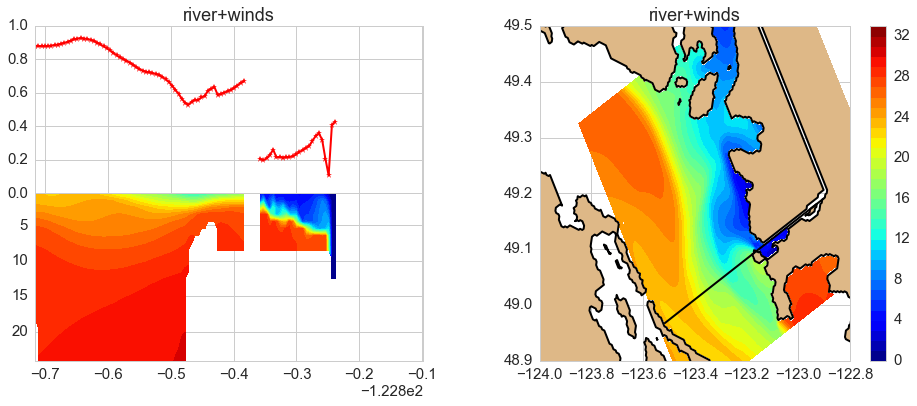

In [12]:
r_notide,S_small= salinity_profile_update(octnotide_T,48,143,10,np_mask,'river+winds',mask_flag='0')

(130, 157)


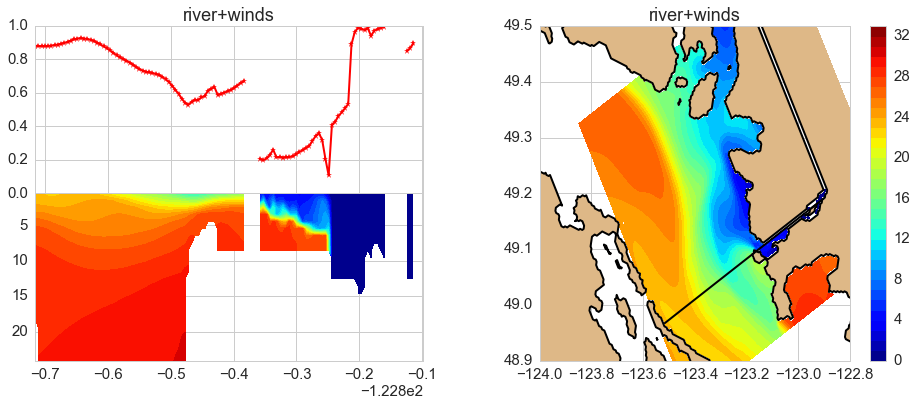

In [40]:
r_notide,S_ave=salinity_profile_update(octnotide_T,48,143,10,np_mask,'river+winds',mask_flag='tmask')

* weak winds

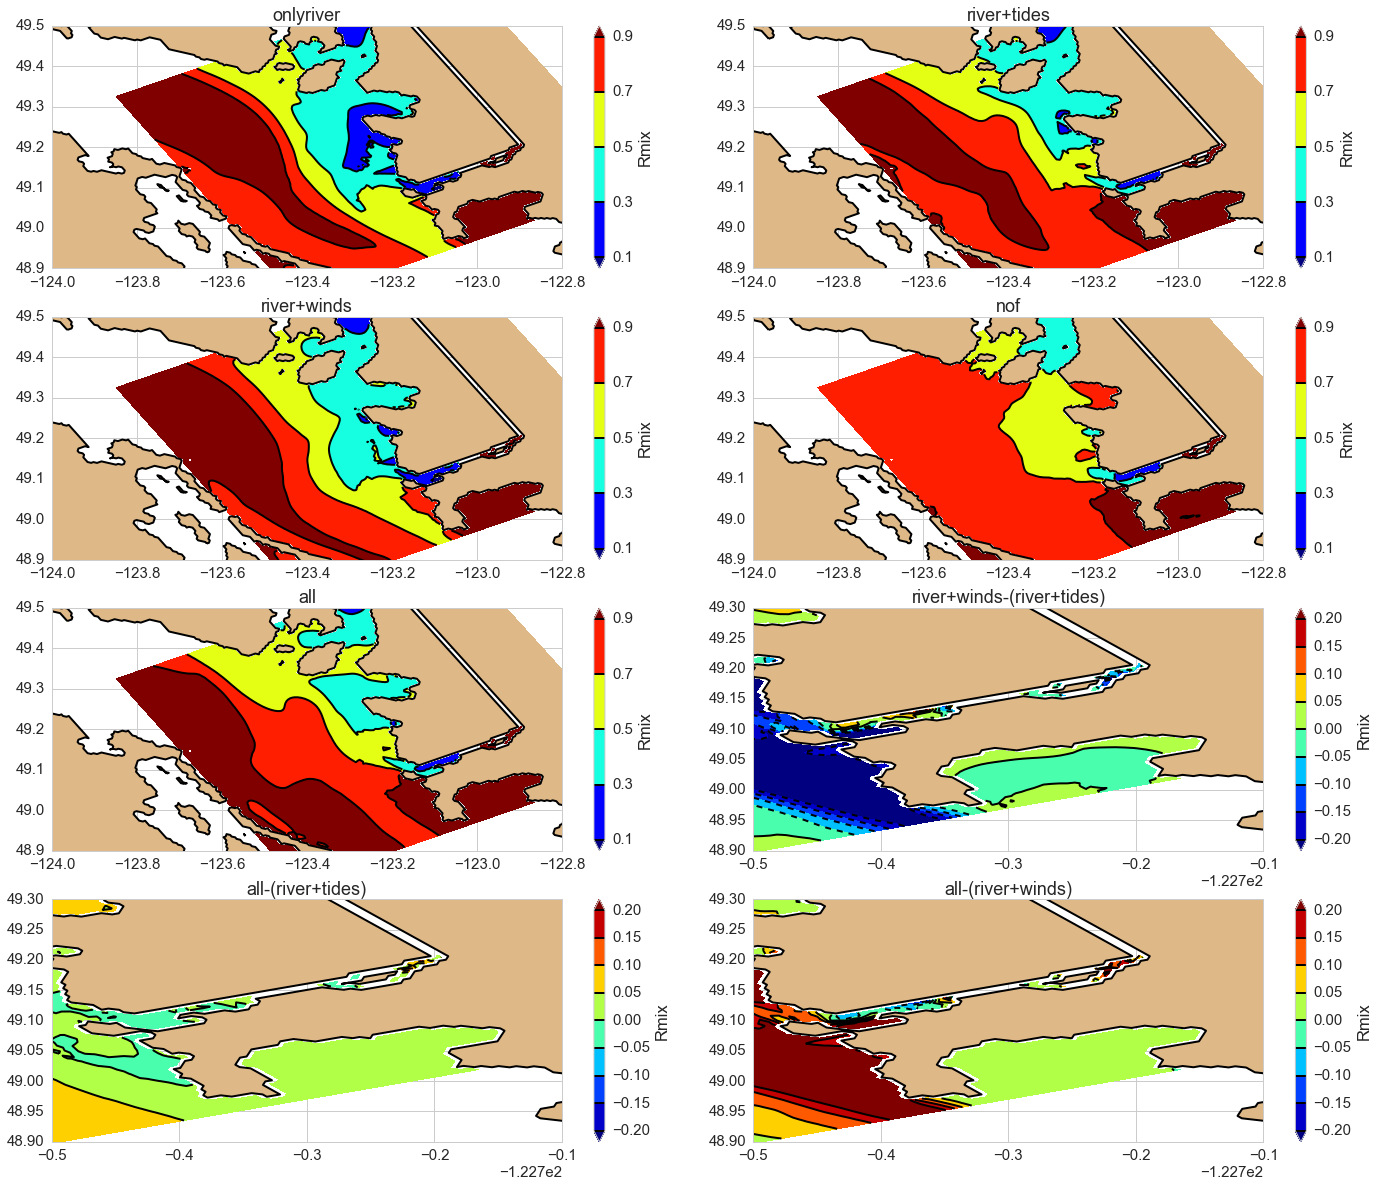

In [48]:
## weak
rmix_each(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,48,143,10)

* Looks like in this time period(weak wind +oct), both tides and winds overmix compared to all.

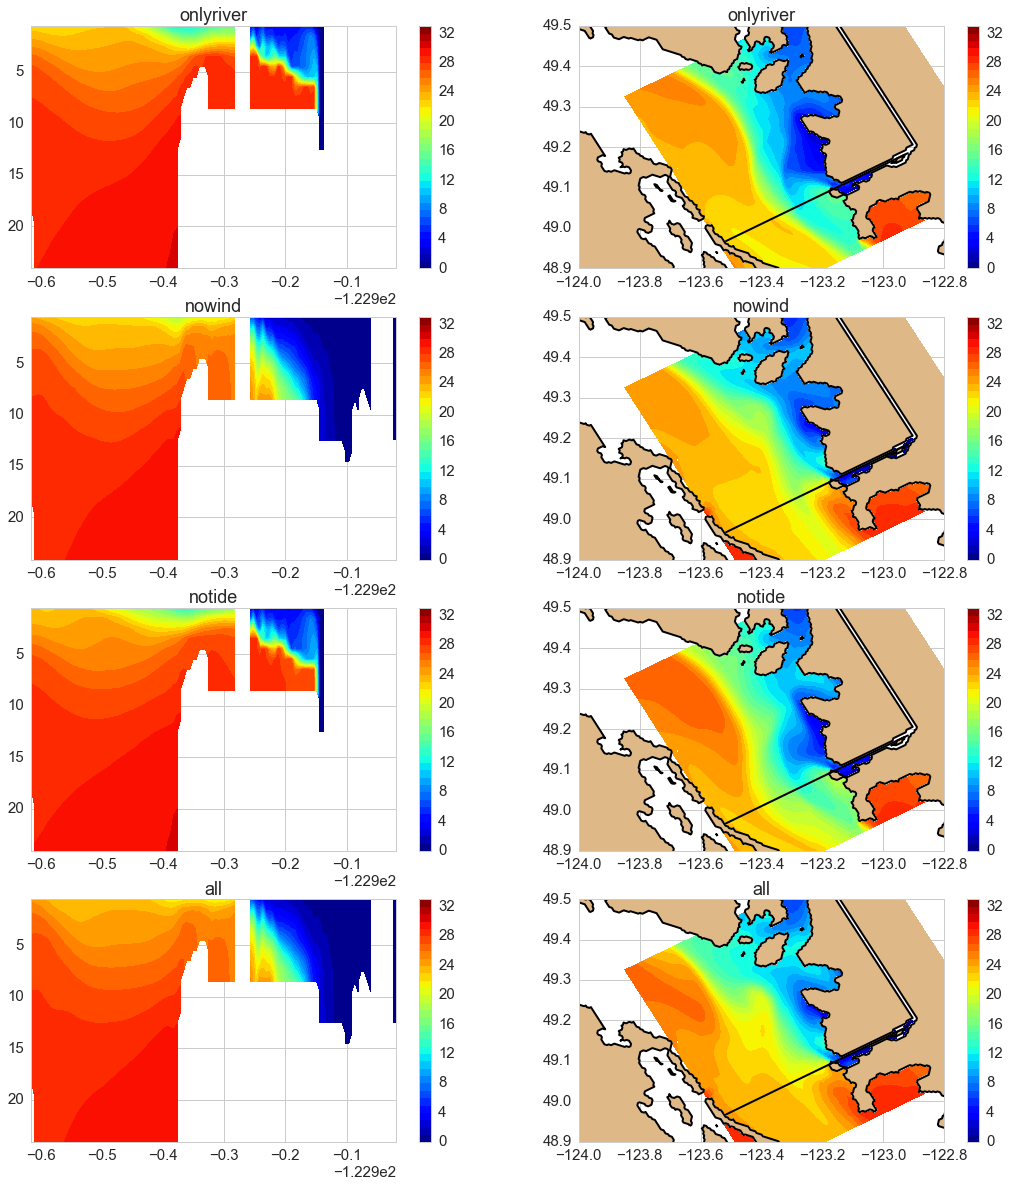

In [41]:
S_small = salinity_profile(octriver_T,octnowind_T,octnotide_T,octall_T,48,143)

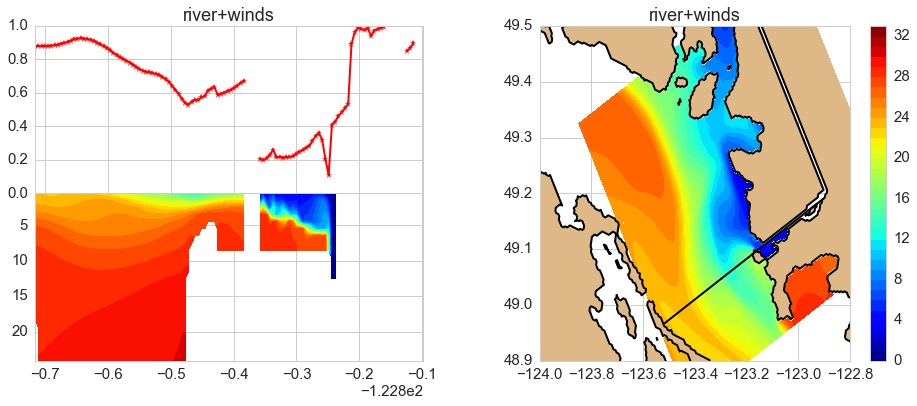

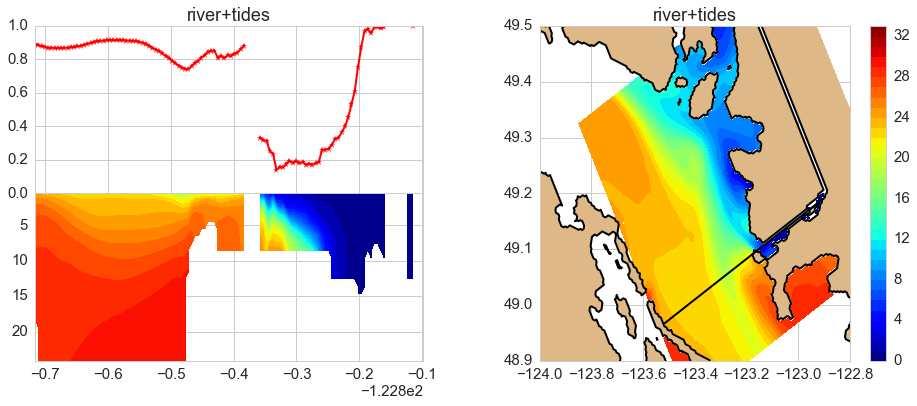

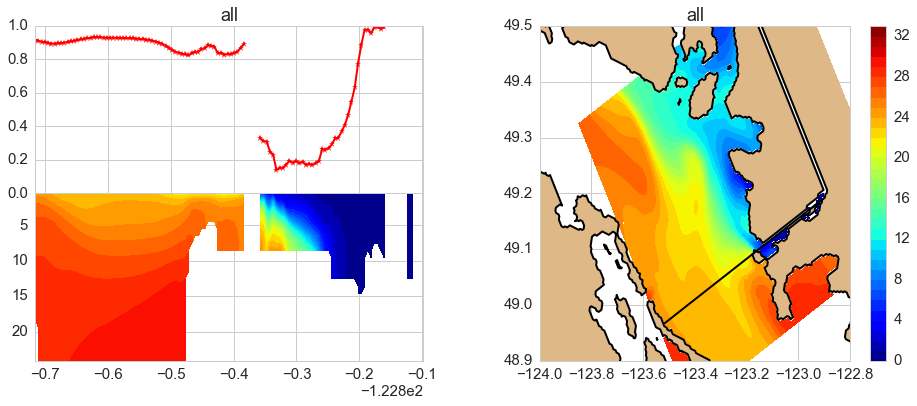

In [126]:
r_notide = salinity_profile_update(octnotide_T,48,143,10,'river+winds')
r_nowind = salinity_profile_update(octnowind_T,48,143,10,'river+tides')
r_all= salinity_profile_update(octall_T,48,143,10,'all')

In [132]:
S_small['notide'][:,106]

masked_array(data = [-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- --],
             mask = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True],
       fill_value = 0.0)

* moderate wind

In [ ]:
r_notide = salinity_profile_update(octnotide_T,408,480,10,'river+winds')
r_nowind = salinity_profile_update(octnowind_T,408,480,10,'river+tides')
r_all= salinity_profile_update(octall_T,408,480,10,'all')

In [127]:
r_notide['river+winds'][36,110]

0.98877847

In [128]:
r_nowind['river+tides'][36,110]

0.98529851

* Demonstrate Susan's hypothesis, with tides turning on, salt wedge intrusion decreased,